# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Mohammad Danendra Cleosa Susilo
- **Email:** Danendracleosa@gmail.com
- **ID Dicoding:** M232D4KY1644

---



## Menentukan Pertanyaan Bisnis

- Rata rata per tahun tingkat polusi kota Guanyuan selama 5 tahun (2013-2017)
- Perubahan suhu dan tekanan udara kota Guanyuan selama 5 tahun

## Import Semua Packages/Library yang Digunakan

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [56]:
df = pd.read_csv("https://raw.githubusercontent.com/Danendracleo/Guanyuan.csv/main/PRSA_Data_Guanyuan_20130301-20170228.csv")
df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


### Assessing Data

In [57]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [58]:
df.isna().sum() # menghitung jumlah nilai missing value

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [59]:
df.duplicated().sum() #menghitung jumlah data yang sama atau duplikasi

0

In [60]:
df.describe() #menampilkan parameter statistik data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


### Cleaning Data

In [61]:
df = df.drop(columns = ('station')) #drop kolom 'station' karena bersifat data ketogorik
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0


In [62]:
df.fillna(method = "ffill", inplace=True) #mengisi data yang bersifat N/A atau kosong

In [63]:
df.isna().sum() #memeriksa kembali jumlah missing value

No       0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

In [64]:
df.sample(5) #menampilkan 5 data acak setelah proses data wrangling

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
25761,25762,2016,2,7,9,29.0,61.0,21.0,61.0,1100.0,13.0000,0.0,1018.0,-13.7,0.0,ESE,0.8
1974,1975,2013,5,22,6,53.0,115.0,30.0,86.0,1000.0,18.8496,19.0,1005.0,13.2,0.0,ENE,1.1
5886,5887,2013,11,1,6,224.0,240.0,16.0,113.0,2600.0,8.5680,4.8,1021.4,4.2,0.0,NE,0.4
30231,30232,2016,8,11,15,90.0,112.0,6.0,18.0,1200.0,182.0000,35.3,1001.0,25.8,0.0,S,2.5
22305,22306,2015,9,16,9,132.0,137.0,8.0,72.0,1400.0,56.0000,18.9,1015.4,15.0,0.0,ENE,1.7


In [65]:
#polusi
average_pollution_by_year = df.groupby(by = ['year'] ).agg({
            "PM2.5" : "mean",
            "PM10" : "mean",
            "SO2" : "mean",
            "NO2" : "mean",
            "CO" : "mean",
            "O3" : "mean"}).sort_values(by = ['year'], ascending = True) # Mengelompokkan data berdasarkan tahun dan menghitung rata-rata polusi untuk setiap tahun
average_pollution_by_year = average_pollution_by_year.reset_index() #Mengatur hasil pengelompokan sebagai DataFrame dan reset index
average_pollution_by_year['time'] = average_pollution_by_year["year"].astype(str) #mengonversi tahun menjadi string
average_pollution_by_year.head(10) #Menampilkan 10 data pertama pada dataframe

,year,PM2.5,PM10,SO2,NO2,CO,O3,time
0,2013,81.696351,108.090550,21.786163,58.186575,1088.123911,54.303676,2013
1,2014,88.578059,116.055993,23.193858,64.163094,1354.531963,54.690982,2014
2,2015,82.252283,106.342055,14.080502,54.981084,1314.041096,56.808779,2015
3,2016,77.299863,105.056922,11.468352,53.437728,1166.029144,54.962432,2016
4,2017,96.403249,116.297316,21.275424,64.893362,1484.957627,46.016949,2017


In [66]:
#suhu dan tekanan udara
air_average_by_year = df.groupby(by = ['year'] ).agg({
            "TEMP" : "mean",
            "PRES" : "mean"}).sort_values(by = ['year'], ascending = True)
air_average_by_year = air_average_by_year.reset_index()
air_average_by_year['time'] = air_average_by_year["year"].astype(str)
air_average_by_year.head(5)

,year,TEMP,PRES,time
0,2013,15.497740,1008.200408,2013
1,2014,13.878128,1011.318082,2014
2,2015,13.474733,1012.571714,2015
3,2016,13.873747,1012.821671,2016
4,2017,0.665657,1023.619056,2017


## Visualization & Explanatory Analysis

### Pertanyaan 1:  **Rata rata per tahun tingkat polusi kota Guanyuan selama 5 tahun (2013-2017)**

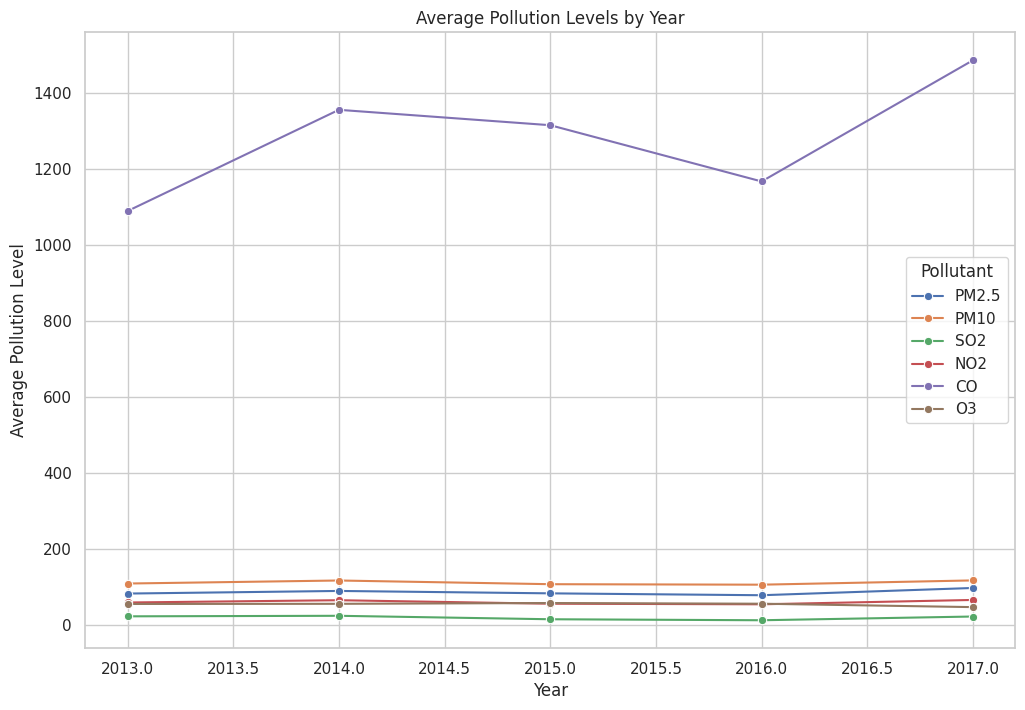

In [67]:
#visualisasi data


sns.set(style="whitegrid")

# Membuat lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='PM2.5', data=average_pollution_by_year, label='PM2.5', marker='o')
sns.lineplot(x='year', y='PM10', data=average_pollution_by_year, label='PM10', marker='o')
sns.lineplot(x='year', y='SO2', data=average_pollution_by_year, label='SO2', marker='o')
sns.lineplot(x='year', y='NO2', data=average_pollution_by_year, label='NO2', marker='o')
sns.lineplot(x='year', y='CO', data=average_pollution_by_year, label='CO', marker='o')
sns.lineplot(x='year', y='O3', data=average_pollution_by_year, label='O3', marker='o')

# Label dan judul plot
plt.title('Average Pollution Levels by Year')
plt.xlabel('Year')
plt.ylabel('Average Pollution Level')
plt.legend(title='Pollutant', )
plt.show()

In [68]:
#membuat klasifikasi tingkat kesehatan polusi
def airpolution_show(df):
    pm25= round(df['PM2.5'].mean(), 1)
    pm10= round(df['PM10'].mean(), 0)
    SO2= round(df['SO2'].mean(), 2)
    NO2= round(df['NO2'].mean(), 2)
    CO= round(df['CO'].mean(), 2)
    O3= round(df['O3'].mean(),2)

    if (pm25 <= 15.5):
      print("Rata-rata PM2.5: " + str(pm25) + "\n BAIK" )
    elif ((pm25 >= 15.6) & (pm25 <= 55.4)):
      print("Rata-rata PM2.5: " + str(pm25) + "\n SEDANG" )
    elif ((pm25 >= 55.5) & (pm25 <= 150.4)):
      print("Rata-rata PM2.5: " + str(pm25) + "\n TIDAK SEHAT" )
    elif ((pm25 >= 150.5) & (pm25 <= 250.4)):
      print("Rata-rata PM2.5: " + str(pm25)+ "\n SANGAT TIDAK SEHAT")
    else:
      print("Rata-rata PM2.5: " + str(pm25) + "\n BERBAHAYA" )

    if (pm10 <= 50):
      print("Rata-rata PM10: " + str(pm10) + "\n BAIK" )
    elif ((pm10  >= 51) & (pm10 <= 150)):
      print("Rata-rata PM10: " + str(pm10) + "\n SEDANG" )
    elif ((pm10  >= 151) & (pm10  <= 350)):
      print("Rata-rata PM10: " + str(pm10) + "\n TIDAK SEHAT" )
    elif ((pm10 >= 351) & (pm10 <= 420)):
      print("Rata-rata PM10: " + str(pm10) + "\n SANGAT TIDAK SEHAT" )
    else:
      print("Rata-rata PM10: " + str(pm10) + "\n BERBAHAYA" )

    if (SO2 <= 50):
      print("Rata-rata SO2: " + str(SO2) + "\n BAIK" )
    elif ((SO2  >= 51) & (SO2 <= 180)):
      print("Rata-rata SO2: " + str(SO2) + "\n SEDANG" )
    elif ((SO2  >= 181) & (SO2  <= 400)):
      print("Rata-rata SO2: " + str(SO2) + "\n TIDAK SEHAT" )
    elif ((SO2 >= 401) & (SO2 <= 800)):
      print("Rata-rata SO2: " + str(SO2) + "\n SANGAT TIDAK SEHAT" )
    else:
      print("Rata-rata SO2: " + str(SO2) + "\n BERBAHAYA" )

    if (CO <=4000):
      print("Rata-rata CO: " + str(CO) + "\n BAIK" )
    elif ((CO  >= 4001) & (CO <= 8000)):
      print("Rata-rata CO: " + str(CO) + "\n SEDANG" )
    elif ((CO  >= 8001) & (CO  <= 15000)):
      print("Rata-rata CO: " + str(CO) + "\n TIDAK SEHAT" )
    elif ((CO >= 15001) & (CO <= 30000)):
      print("Rata-rata CO: " + str(CO) + "\n SANGAT TIDAK SEHAT" )
    else:
      print("Rata-rata CO: " + str(CO) + "\n BERBAHAYA" )

    if (O3 <=120):
      print("Rata-rata 03: " + str(O3) + "\n BAIK" )
    elif ((O3  >= 121) & (O3 <= 235)):
      print("Rata-rata O3: " + str(O3) + "\n SEDANG" )
    elif ((O3  >= 236) & (O3  <= 400)):
      print("Rata-rata O3: " + str(O3) + "\n TIDAK SEHAT" )
    elif ((O3 >= 401) & (O3 <= 800)):
      print("Rata-rata O3: " + str(O3) + "\n SANGAT TIDAK SEHAT" )
    else:
      print("Rata-rata O3: " + str(O3) + "\n BERBAHAYA" )


    if (NO2 <=80):
      print("Rata-rata NO2: " + str(NO2) + "\n BAIK" )
    elif ((NO2  >= 81) & (NO2 <= 200)):
      print("Rata-rata NO2: " + str(NO2) + "\n SEDANG" )
    elif ((NO2  >= 201) & (NO2  <= 1130)):
      print("Rata-rata NO2: " + str(NO2) + "\n TIDAK SEHAT" )
    elif ((NO2 >= 1131) & (NO2 <= 2260)):
      print("Rata-rata NO2: " + str(NO2) + "\n SANGAT TIDAK SEHAT" )
    else:
      print("Rata-rata NO2: " + str(NO2) + "\n BERBAHAYA" )



In [69]:
# Klasifikasi tingkat polusi pada 2013 sampai 2017
print("Klasifikasi tingkat polusi pada 2013 sampai 2013")
airpolution_show(average_pollution_by_year.head(5))

Klasifikasi tingkat polusi pada 2013 sampai 2013
Rata-rata PM2.5: 85.2
 TIDAK SEHAT
Rata-rata PM10: 110.0
 SEDANG
Rata-rata SO2: 18.36
 BAIK
Rata-rata CO: 1281.54
 BAIK
Rata-rata 03: 53.36
 BAIK
Rata-rata NO2: 59.13
 BAIK


### Pertanyaan 2: **Perubahan suhu dan tekanan udara kota Guanyuan selama 5 tahun**

In [70]:
def air_parameters_graph(df):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

    ax[0].plot(df['time'], df['TEMP'], marker='o', linewidth=2, color="#39064B")
    ax[0].tick_params(axis='y', labelsize=20)
    ax[0].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[0].set_ylabel("Suhu (°C)", fontsize=25)
    ax[0].set_title("Suhu", loc="center", fontsize=35)

    ax[1].plot(df['time'], df['PRES'], marker='o', linewidth=2, color="#39064B")
    ax[1].tick_params(axis='y', labelsize=20)
    ax[1].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[1].set_ylabel("Tekanan (hPa)", fontsize=25)
    ax[1].set_title("Tekanan", loc="center", fontsize=35)

    fig.tight_layout(pad=2.0)

    plt.suptitle("Trend Perubahan Suhu dan Tekanan Udara di Aotizhongxin", fontsize=45, y=1.05)
    plt.show()

In [71]:
def airparameters_show(df):
    suhu= round(df['TEMP'].mean(), 2)
    tekanan= round(df['PRES'].mean(), 2)

    print("Rata-rata suhu:", str(suhu) + " °C")
    print("Rata-rata tekanan:", str(tekanan) + " hPa")

2013 sampai 2017 



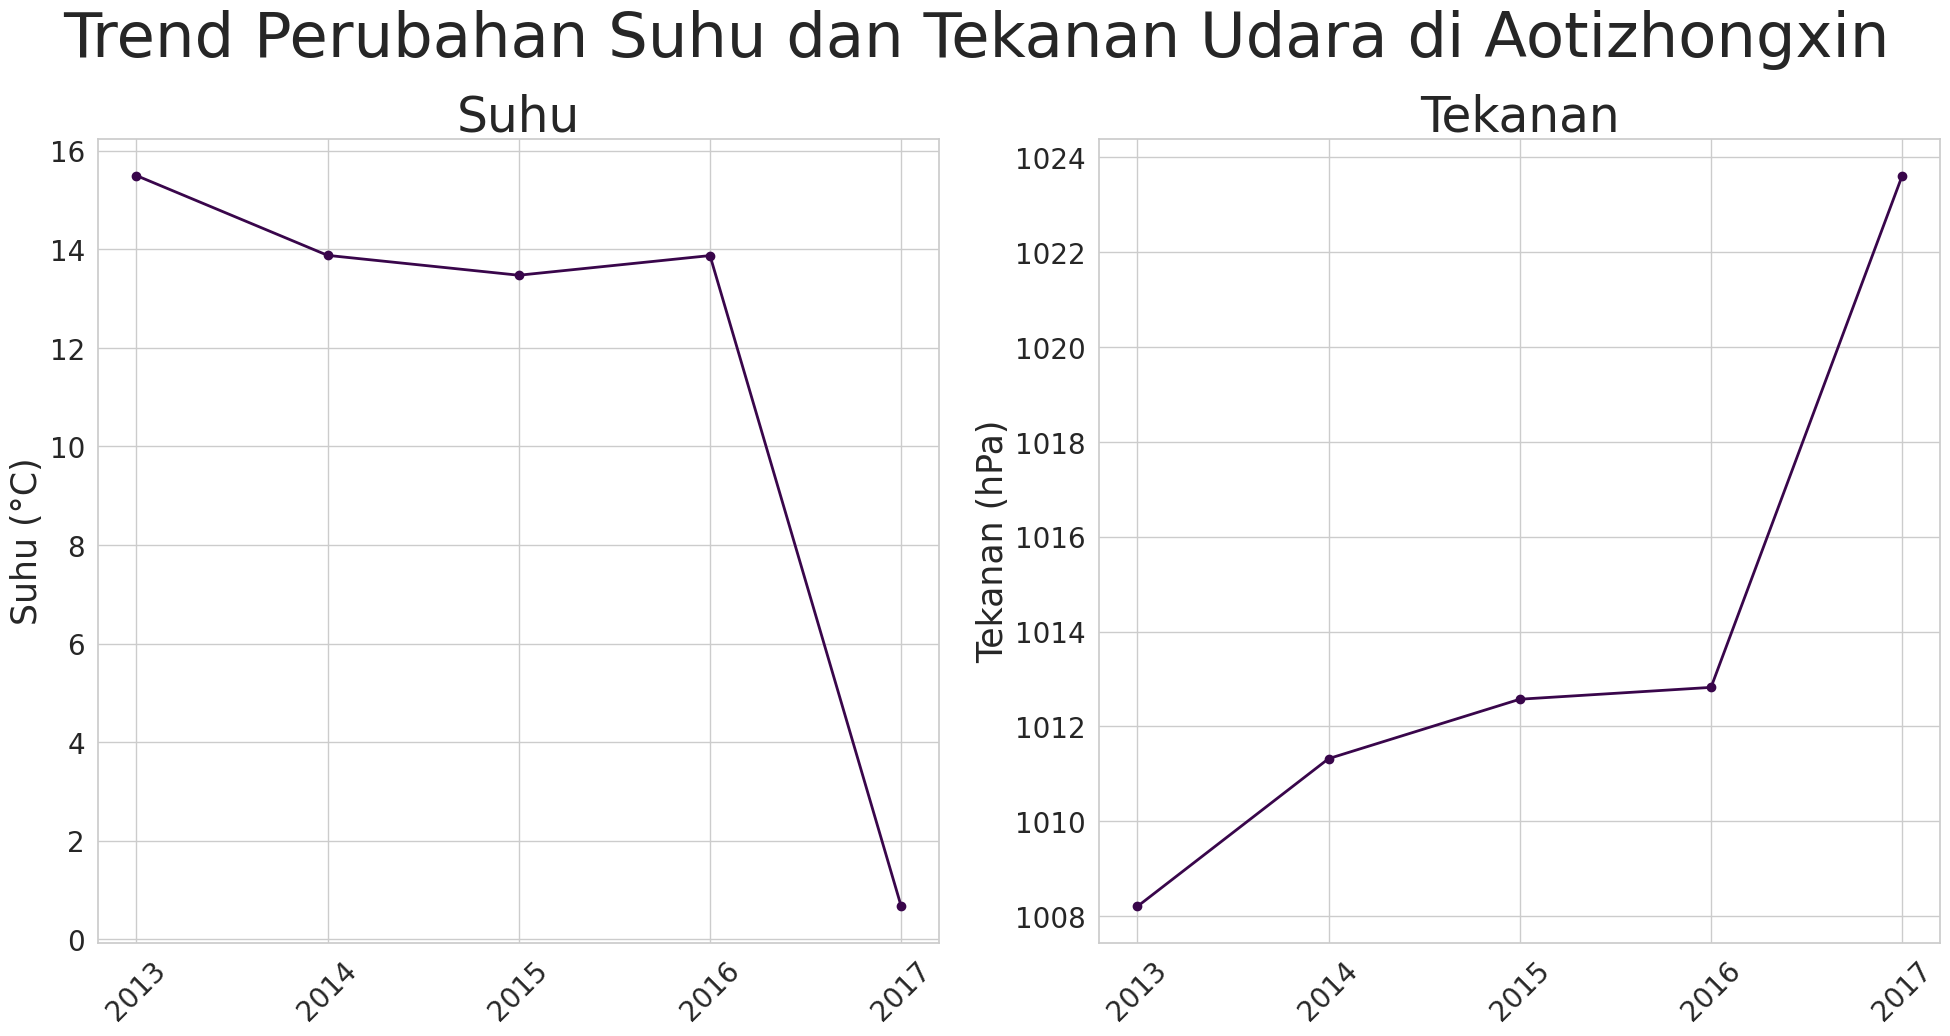

In [72]:
print("2013 sampai 2017 \n")
air_parameters_graph(air_average_by_year.head(5))

## Conclusion

- Conclution pertanyaan 1 :
  
  Grafik tingkat polusi udara di Guanyuan cenderung meningkat meskipun terjadi penurunan di tahun 2014-2016 Akan tetapi, pada tahun 2016 hingga 2017 terjadi peningkatan yang cukup pesat. nilai rata rata parameter tingkat polusi udara PM2.5 dan PM10 pada tahun 2013-2017 cenderung berada pada kondisi tidak sehat untuk PM2.5 dan sedang untuk PM10. Meskipun nilai rata-rata parameter untuk CO,O3,dan NO2 masih tergolong dalam kategori baik



- Conclution pertanyaan 2 :

 Pada lineplot pertanyaan 2 dapat kita tarik kesimpulan bahwa semakin tinggi tingkat tekanan udara akan mengakibatkan suhu yang semakin menurun.

 Pada tren dapat dilihat bahwa dari tahun 2013-2015 terjadi penurunan suhu diakibatkan oleh tekanan udara yang juga menaik. Lalu pada 2015-2016 terjadi peningkatan suhu yang bersamaan dengan peningkatan tekanan udara sebesar 0.25. Lalu pada 2016-2017 terjadi penurunan suhu yang drastis dari 13.8 derajat menjadi 0.6 derajat, yang dimana peningkatan tekanan udara juga melesat tinggi dari 1012.8 menjadi 1023.6.

## Streamlit

In [73]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.2 MB/s eta 0:00:00


In [74]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.033s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [76]:
import urllib
print("Password/Enpoint IP for localtunnel is:", urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 35.230.7.178


In [83]:
!streamlit run /content/dashboard.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 2.563s
your url is: https://shiny-signs-hunt.loca.lt
